In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 82.3 MB/s eta 0:00:00


In [2]:
# ==========================================
# HADAMARD GATE VISUALIZATION & ANALYSIS
# Compatible with Qiskit 2.x
# ==========================================

# -------------------------
# 1️⃣ Imports
# -------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

In [3]:

# -------------------------
# 2️⃣ Helper Function
# -------------------------
def visualize_hadamard(init_state_vector, label):
    """
    Applies Hadamard to a single-qubit initial state and visualizes results.
    """
    # Build circuit for measurement
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Statevector before measurement
    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("After Hadamard, statevector:", state_after.data)

    # Visualizations
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Simulation with AerSimulator
    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")

--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


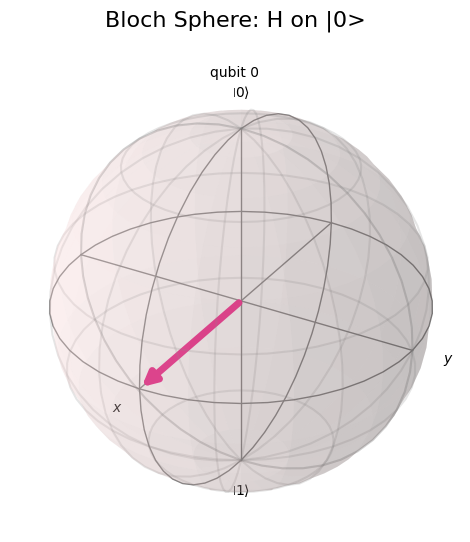

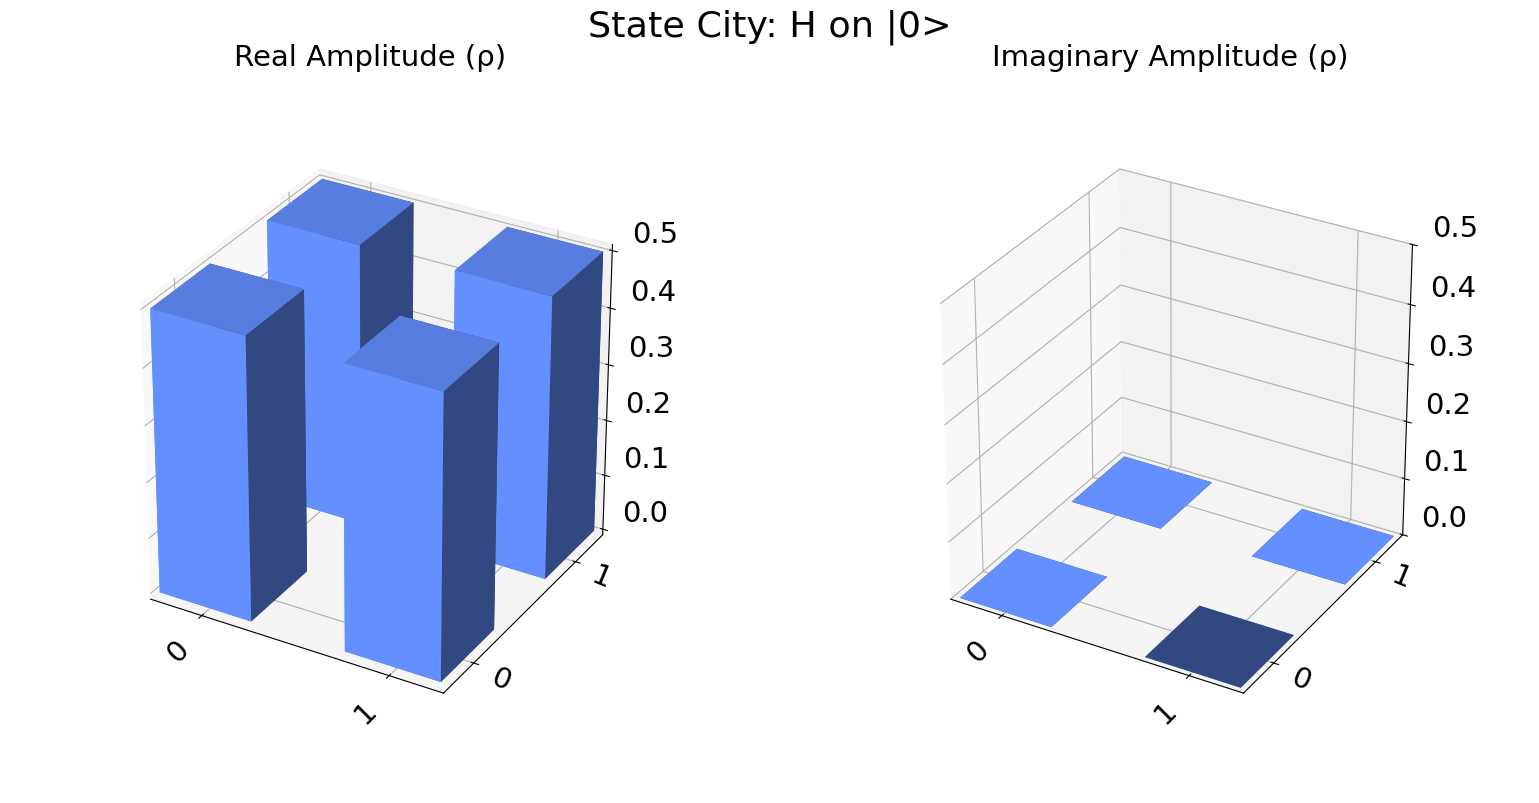

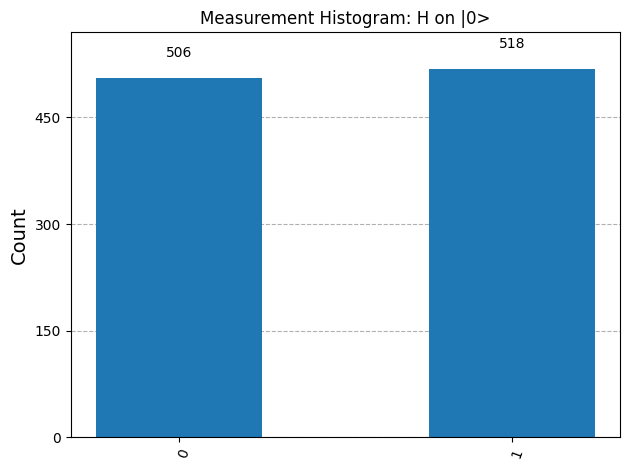



--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


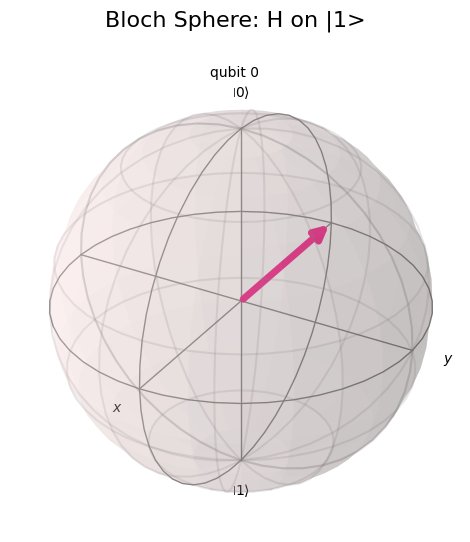

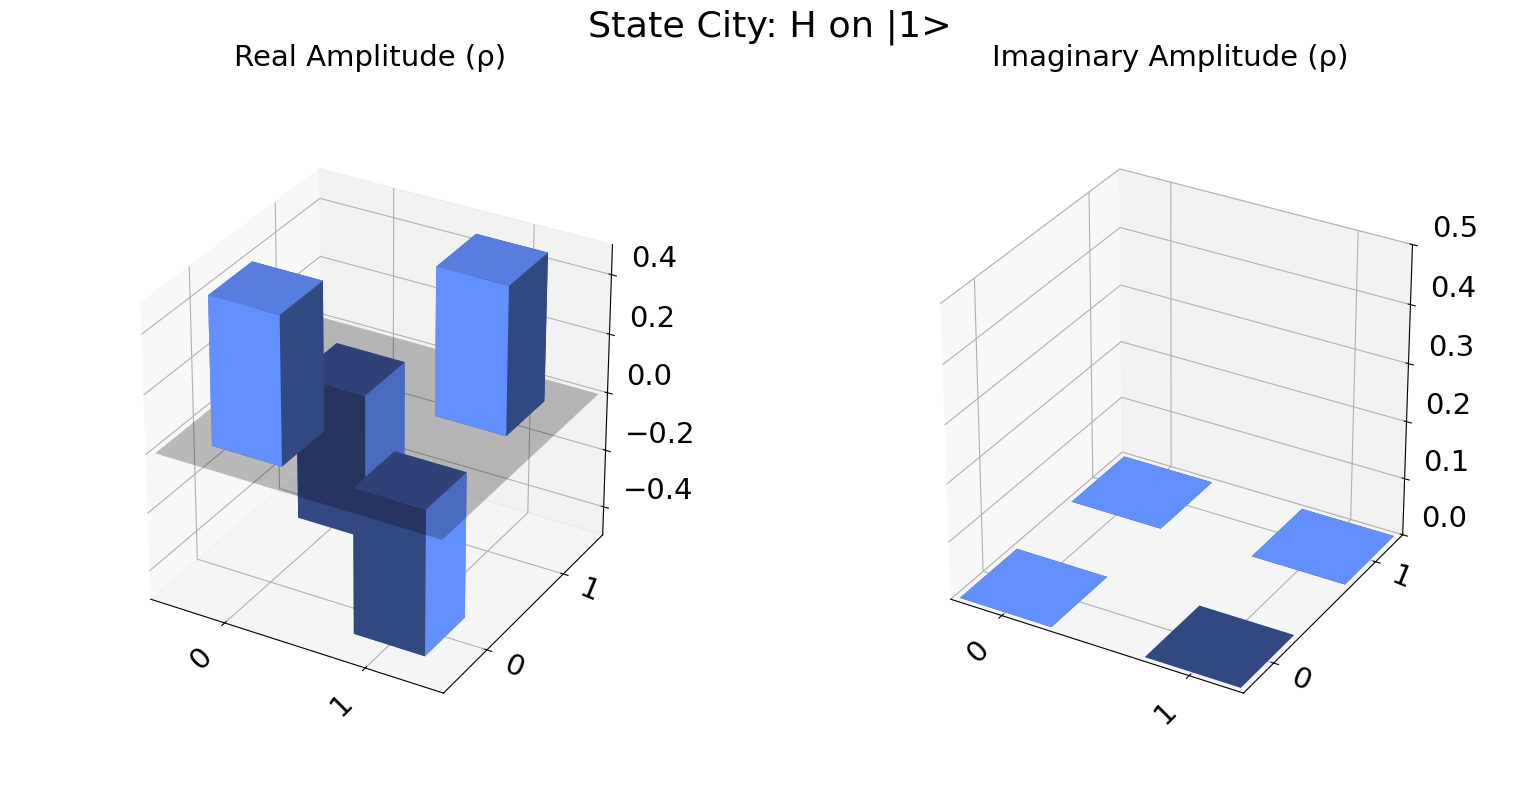

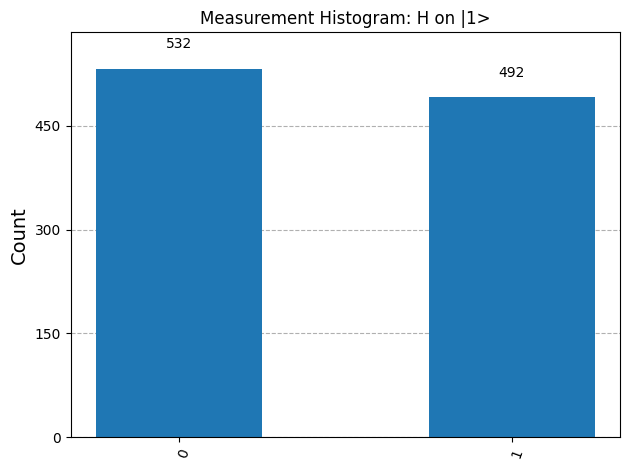



--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


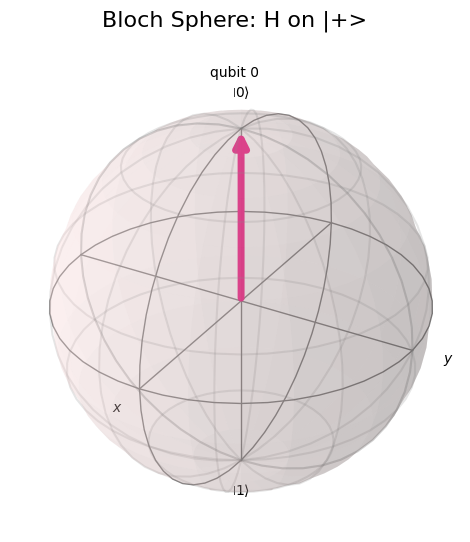

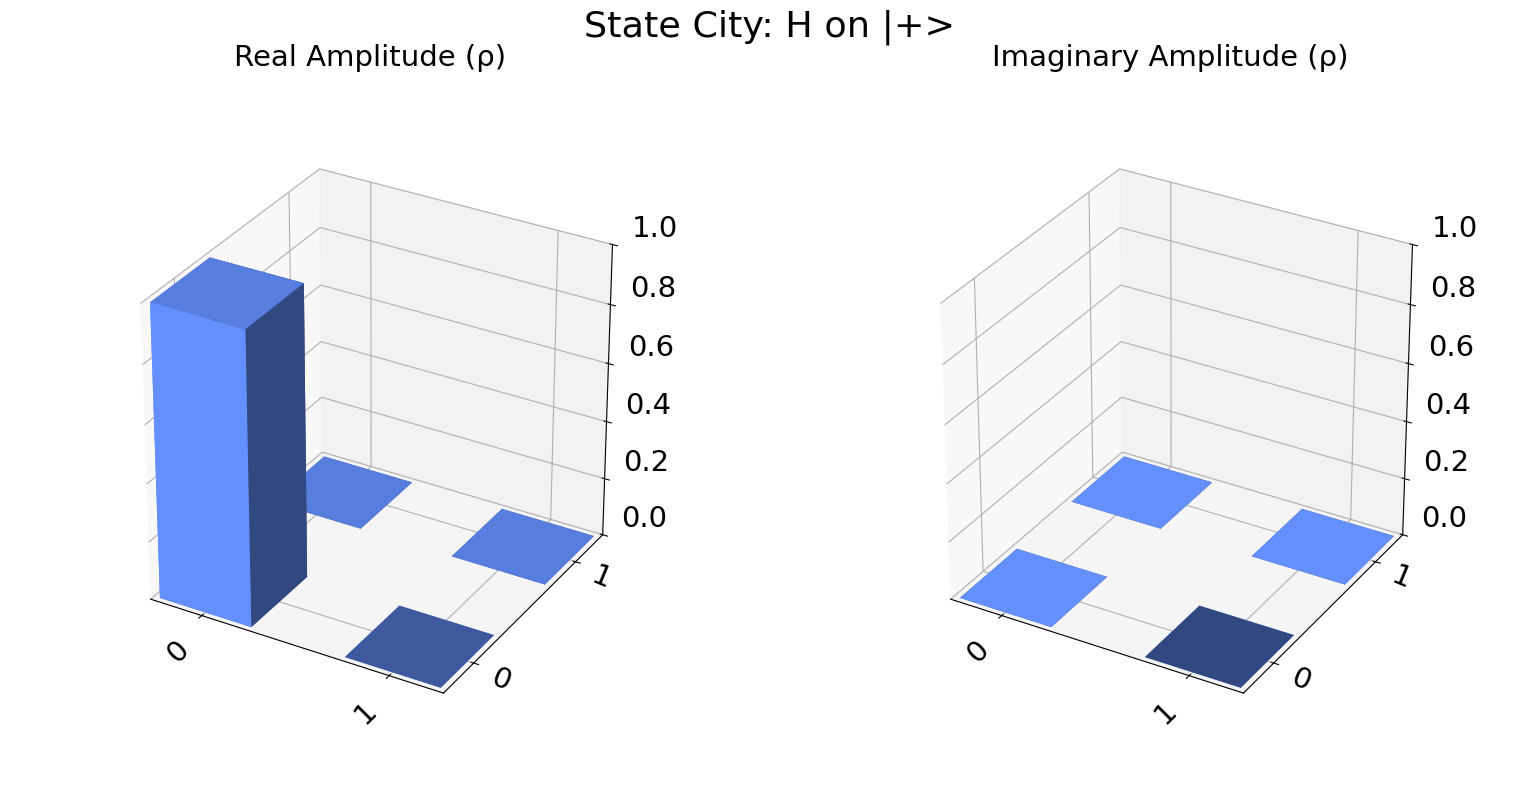

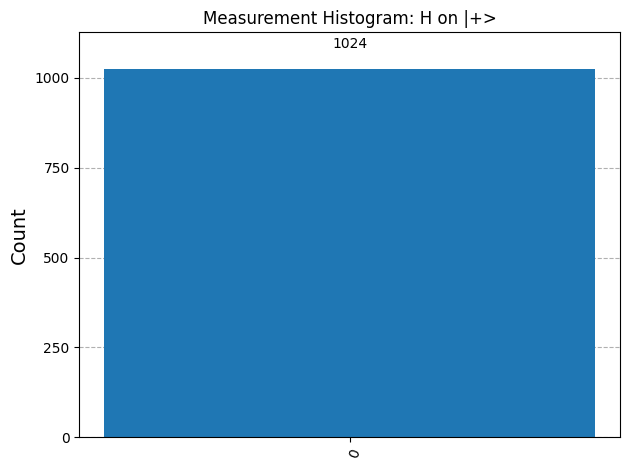



--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


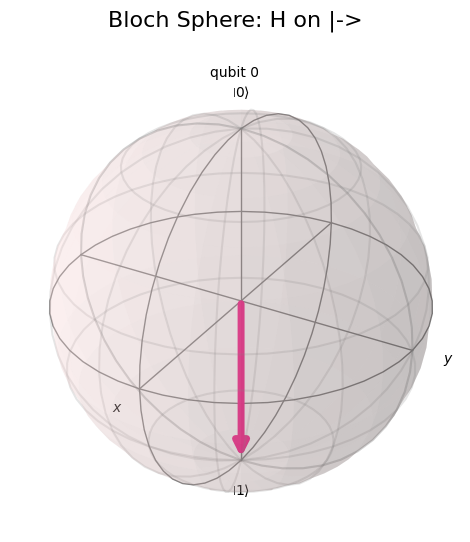

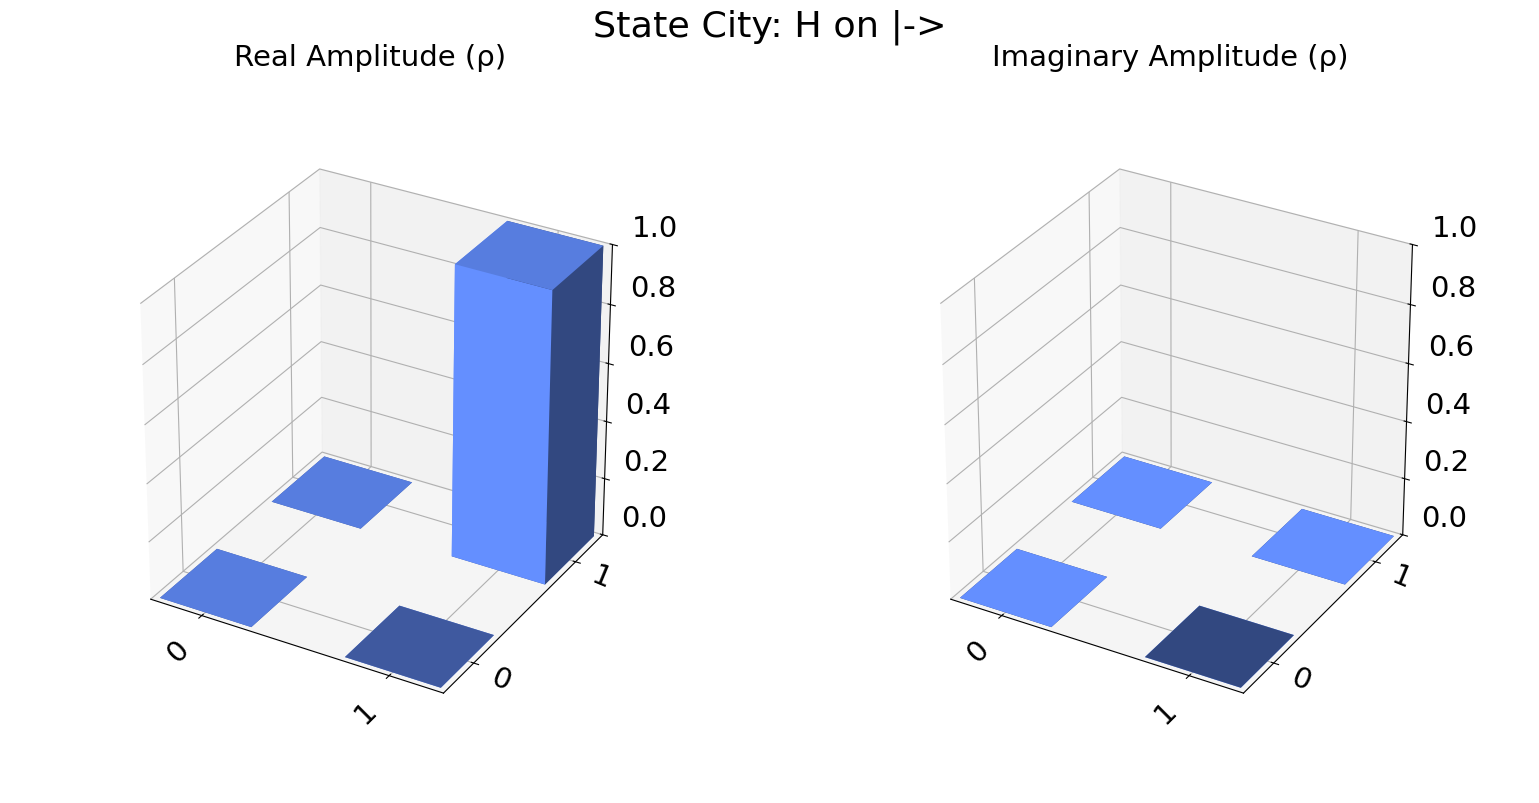

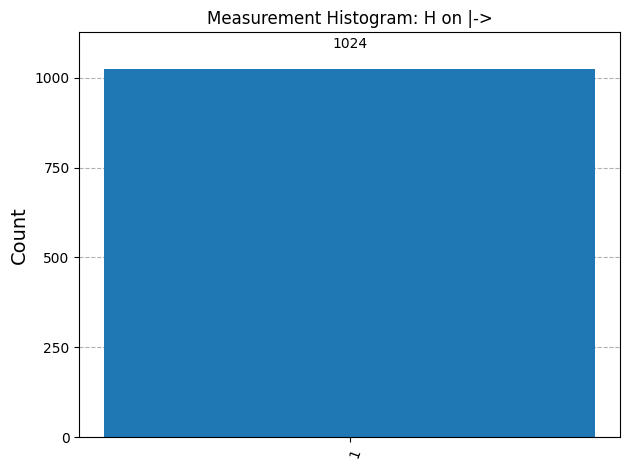

In [4]:
# -------------------------
# 3️⃣ Single Qubit Examples
# -------------------------

# |0>
visualize_hadamard(np.array([1, 0]), "|0>")

# |1>
visualize_hadamard(np.array([0, 1]), "|1>")

# |+> = (|0> + |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")

# |-> = (|0> - |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")


--- Two-Qubit H⊗H on |00> ---
Statevector: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


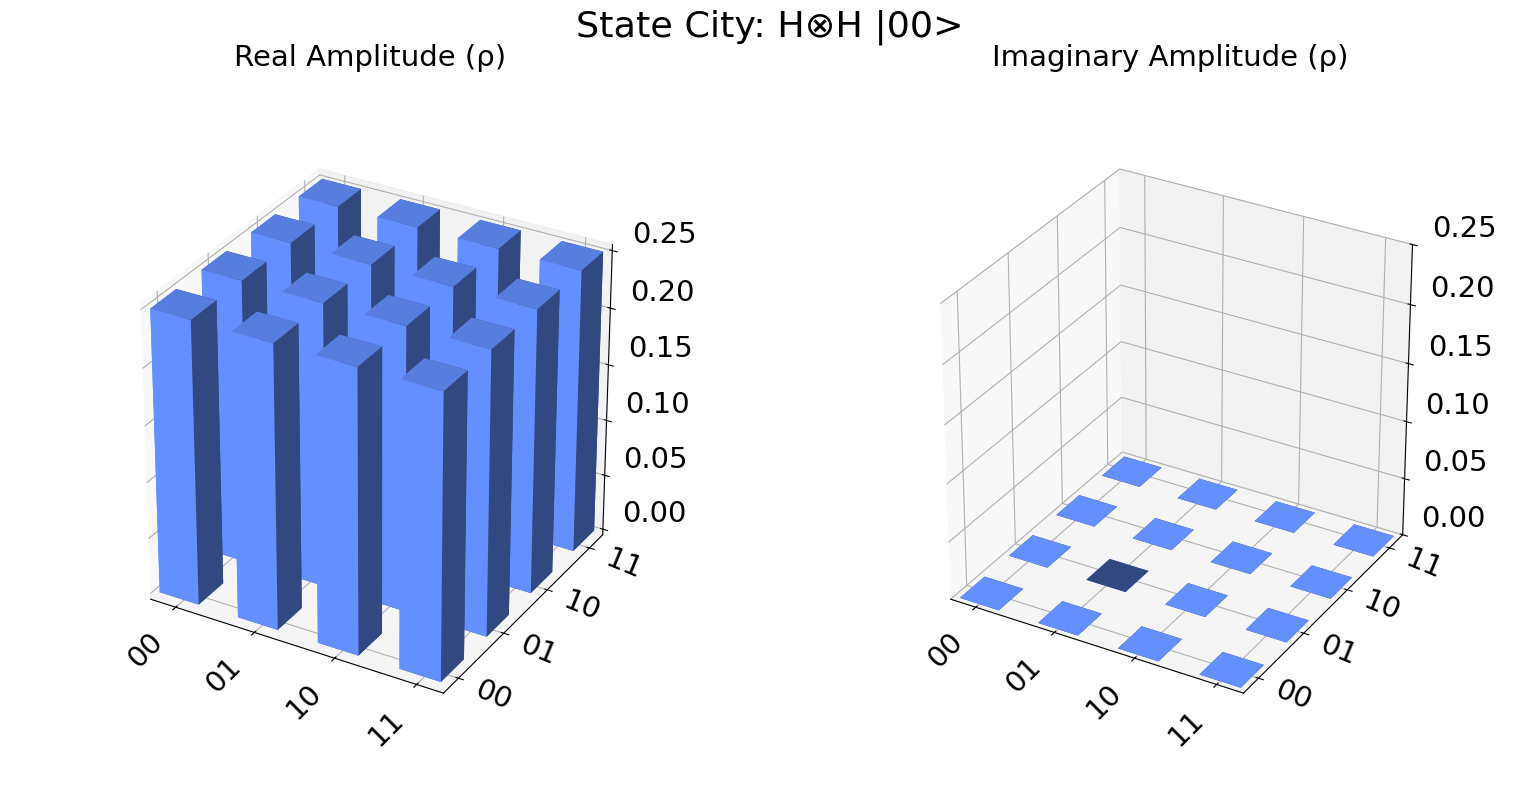

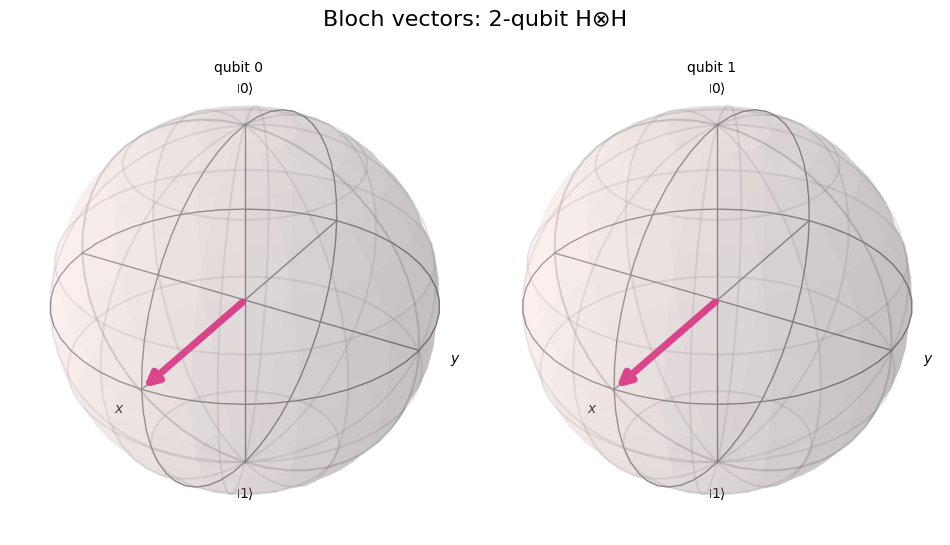

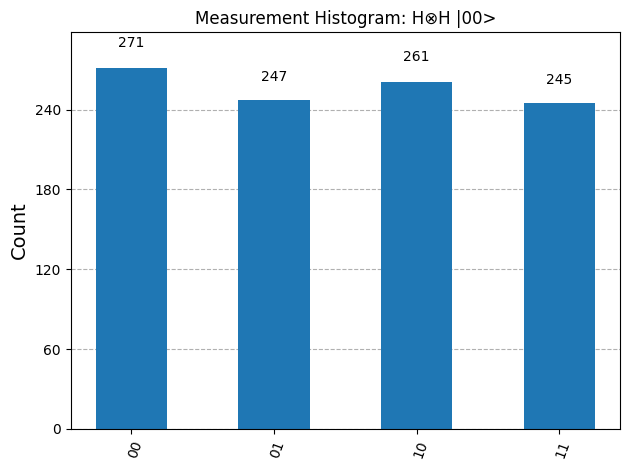


Analytical: equal probability for |00>, |01>, |10>, |11>.



In [5]:

# -------------------------
# 4️⃣ Two Qubit System: H⊗H
# -------------------------
qc2 = QuantumCircuit(2, 2)
qc2.h([0, 1])
qc2.measure([0, 1], [0, 1])

# Statevector before measurement
qc2_state = QuantumCircuit(2)
qc2_state.h([0, 1])
state2 = Statevector.from_instruction(qc2_state)

print("--- Two-Qubit H⊗H on |00> ---")
print("Statevector:", state2.data)

display(plot_state_city(state2, title="State City: H⊗H |00>"))
display(plot_bloch_multivector(state2, title="Bloch vectors: 2-qubit H⊗H"))

# Simulation
sim = AerSimulator()
qc2_t = transpile(qc2, sim)
result2 = sim.run(qc2_t, shots=1024).result()
counts2 = result2.get_counts()
display(plot_histogram(counts2, title="Measurement Histogram: H⊗H |00>"))
print("\nAnalytical: equal probability for |00>, |01>, |10>, |11>.\n")


--- Bell State (|00> + |11>)/√2 ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


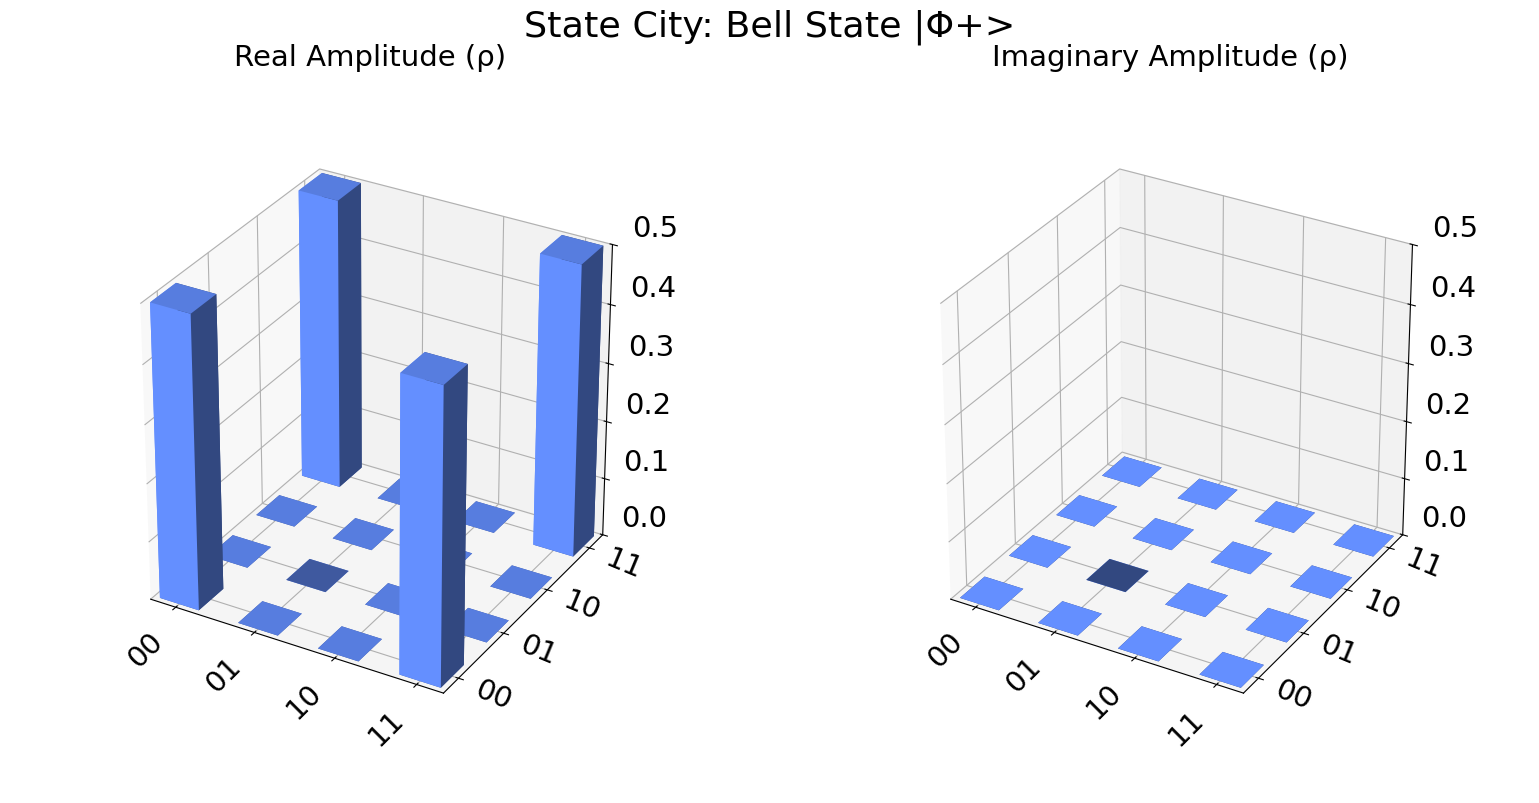

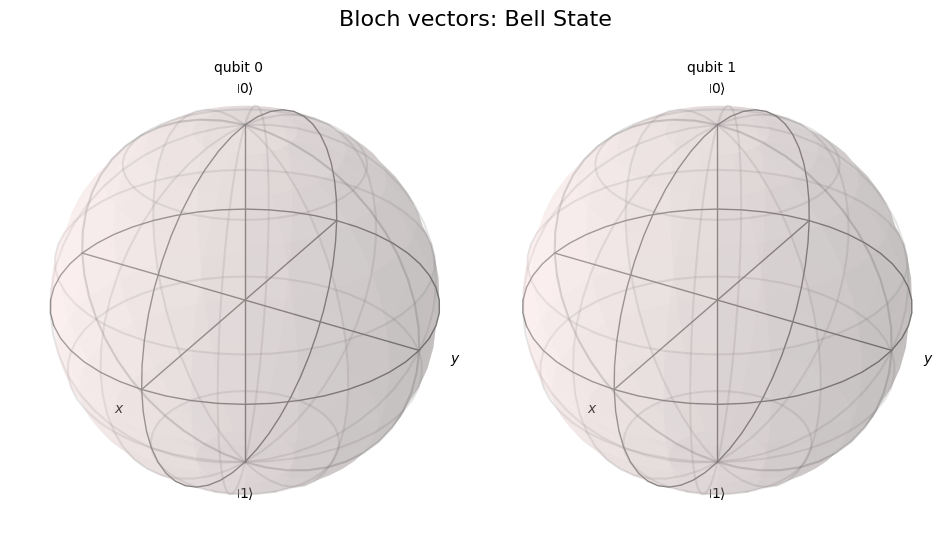

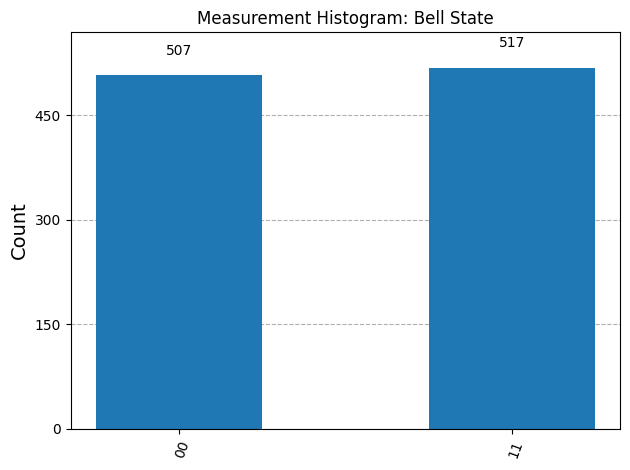


Analytical: outcomes |00> and |11> only, perfectly correlated.



In [6]:
# -------------------------
# 5️⃣ Entangled State (Bell Pair): H + CNOT
# -------------------------
qc_ent = QuantumCircuit(2, 2)
qc_ent.h(0)    # Hadamard on first qubit
qc_ent.cx(0, 1)  # CNOT: entangle qubits
qc_ent.measure([0, 1], [0, 1])

# Statevector before measurement
qc_ent_state = QuantumCircuit(2)
qc_ent_state.h(0)
qc_ent_state.cx(0, 1)
state_ent = Statevector.from_instruction(qc_ent_state)

print("--- Bell State (|00> + |11>)/√2 ---")
print("Statevector:", state_ent.data)

display(plot_state_city(state_ent, title="State City: Bell State |Φ+>"))
display(plot_bloch_multivector(state_ent, title="Bloch vectors: Bell State"))

# Simulation
qc_ent_t = transpile(qc_ent, sim)
result_ent = sim.run(qc_ent_t, shots=1024).result()
counts_ent = result_ent.get_counts()
display(plot_histogram(counts_ent, title="Measurement Histogram: Bell State"))
print("\nAnalytical: outcomes |00> and |11> only, perfectly correlated.\n")


# **Tasks**

# ***1. Predict Statevector after H on |0>, |1>, |+>, |->***


--- Hadamard on |0> ---
Statevector: [0.707+0.j 0.707+0.j]


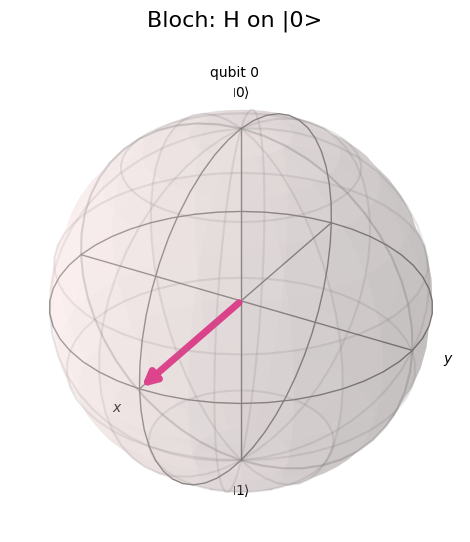

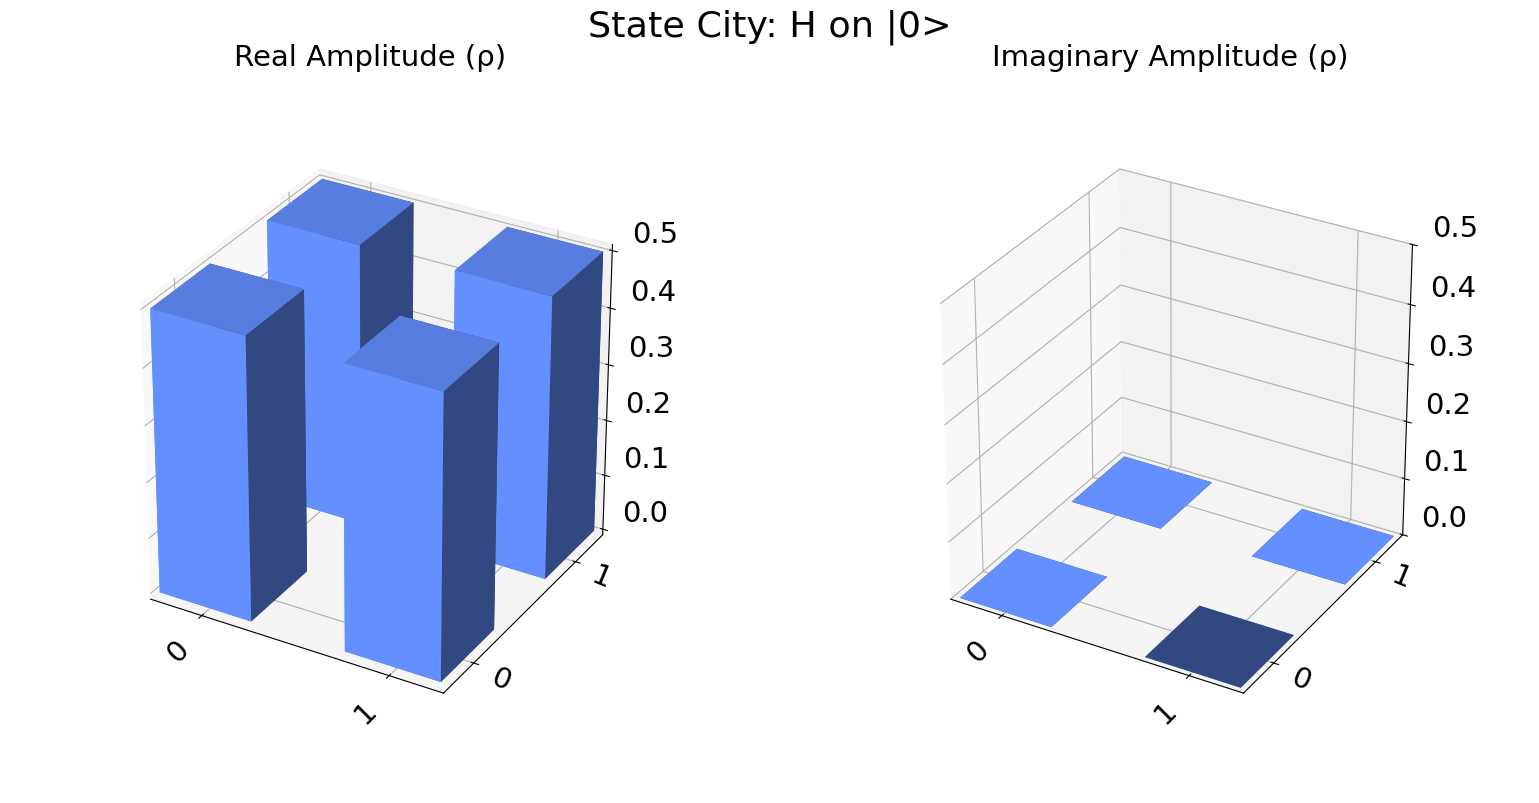


--- Hadamard on |1> ---
Statevector: [ 0.707+0.j -0.707+0.j]


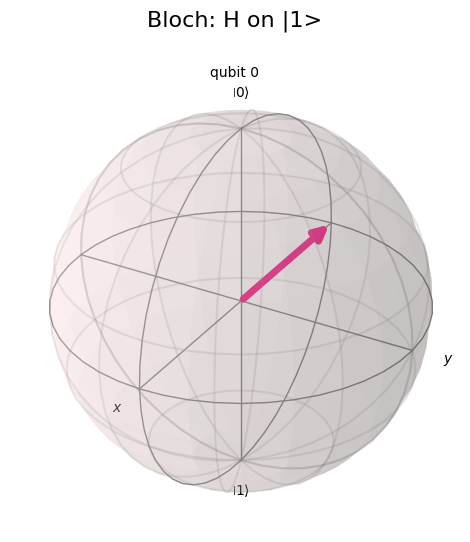

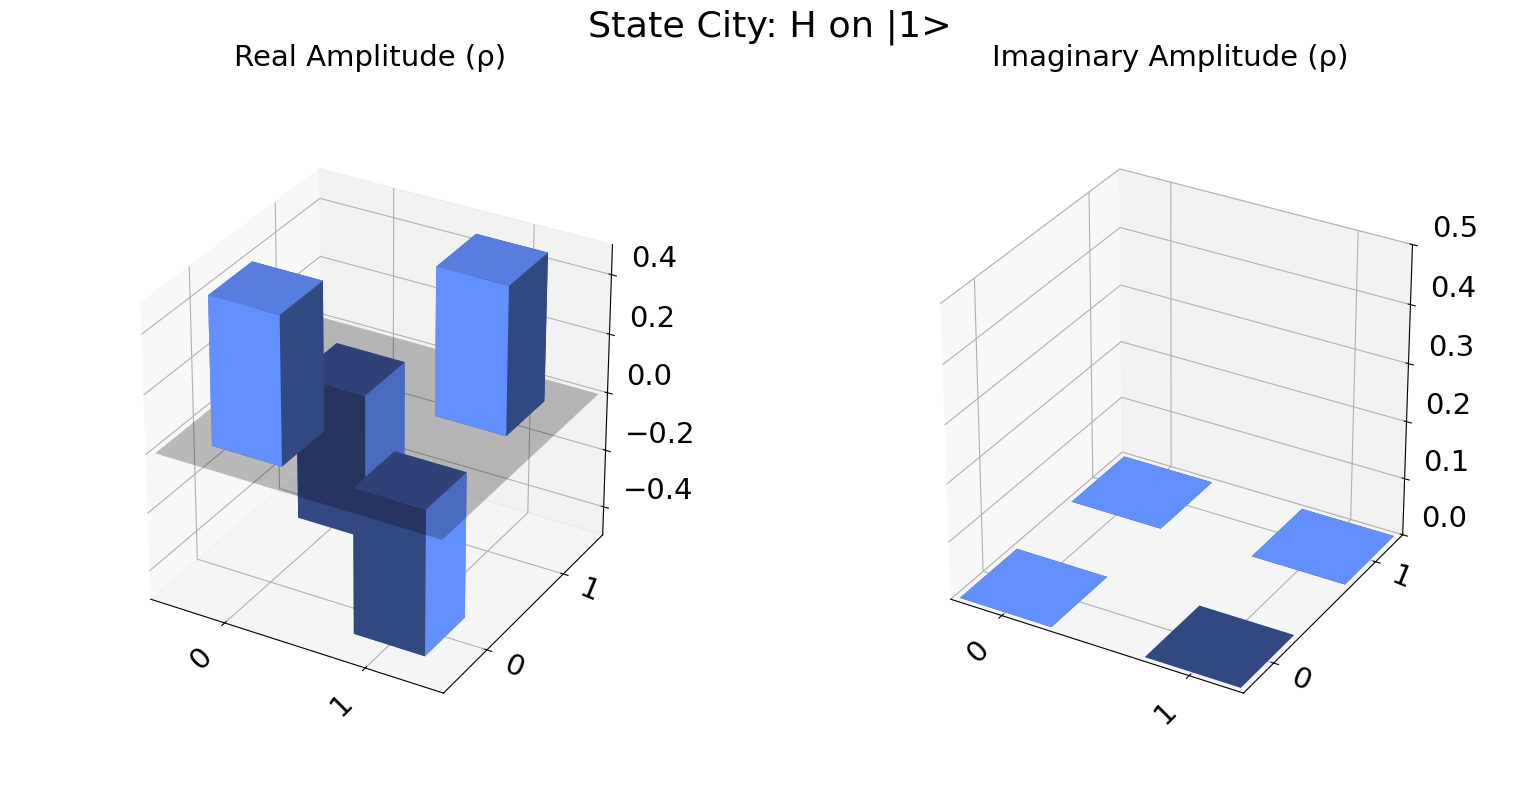


--- Hadamard on |+> ---
Statevector: [1.+0.j 0.+0.j]


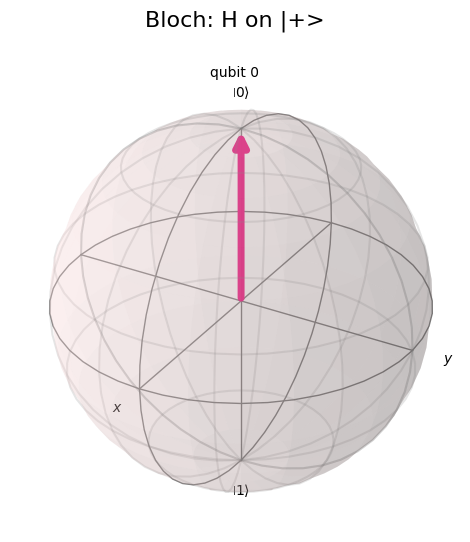

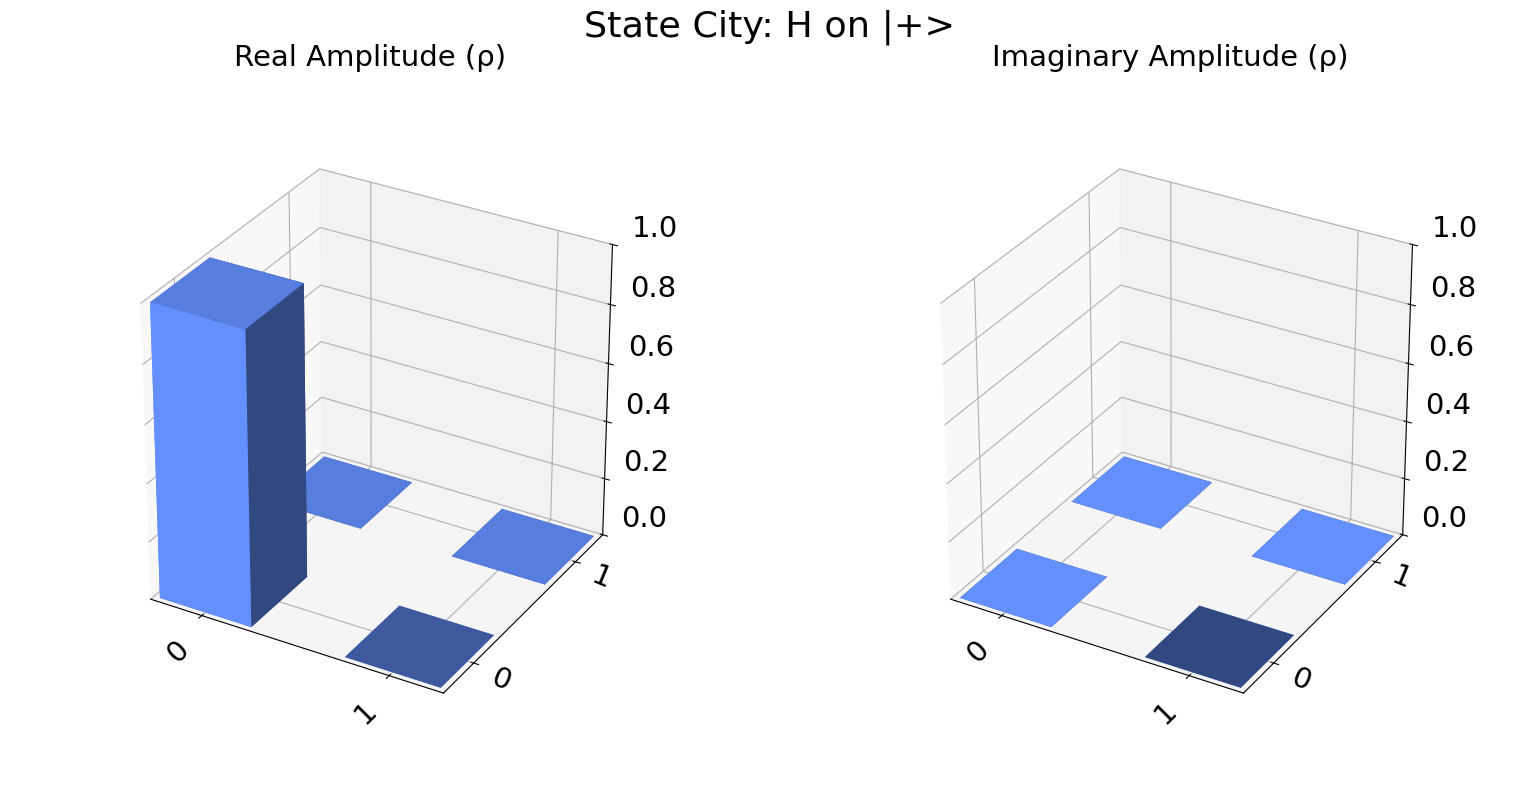


--- Hadamard on |-> ---
Statevector: [0.+0.j 1.+0.j]


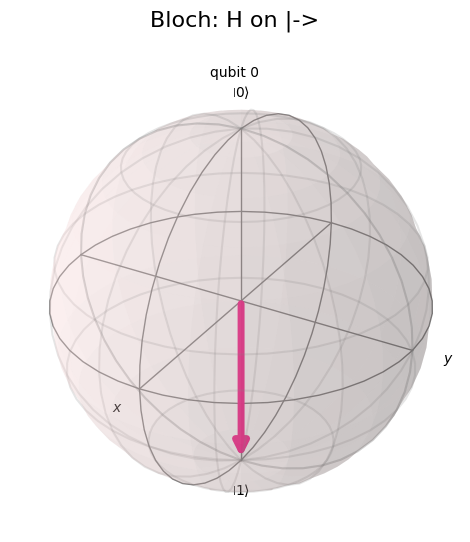

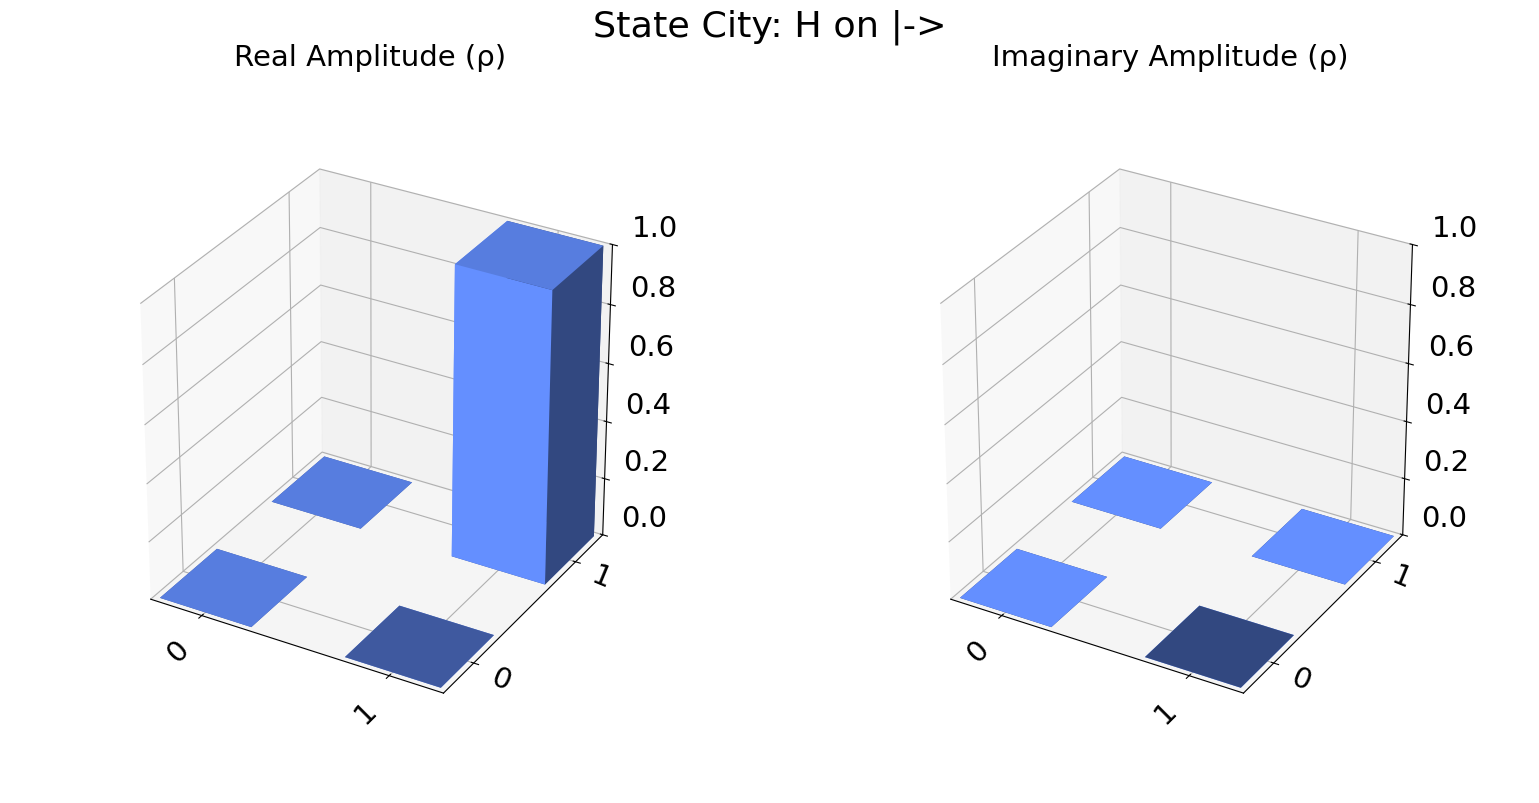

In [8]:
# 1️⃣ Predict the statevector after H on |0>, |1>, |+>, |->

def predict_hadamard(initial_state, label):
    qc = QuantumCircuit(1)
    qc.initialize(initial_state, 0)
    qc.h(0)
    state = Statevector.from_instruction(qc)
    print(f"\n--- Hadamard on {label} ---")
    print("Statevector:", np.round(state.data, 3))
    display(plot_bloch_multivector(state, title=f"Bloch: H on {label}"))
    display(plot_state_city(state, title=f"State City: H on {label}"))

# Run for all four input states
predict_hadamard(np.array([1, 0]), "|0>")
predict_hadamard(np.array([0, 1]), "|1>")
predict_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")
predict_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")


# ***2. Create 3-Qubit System with H⊗H⊗H and Analyze Probabilities***


--- 3-Qubit System: H⊗H⊗H on |000> ---
Statevector length: 8
Amplitude summary (first few): [0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j
 0.354+0.j]


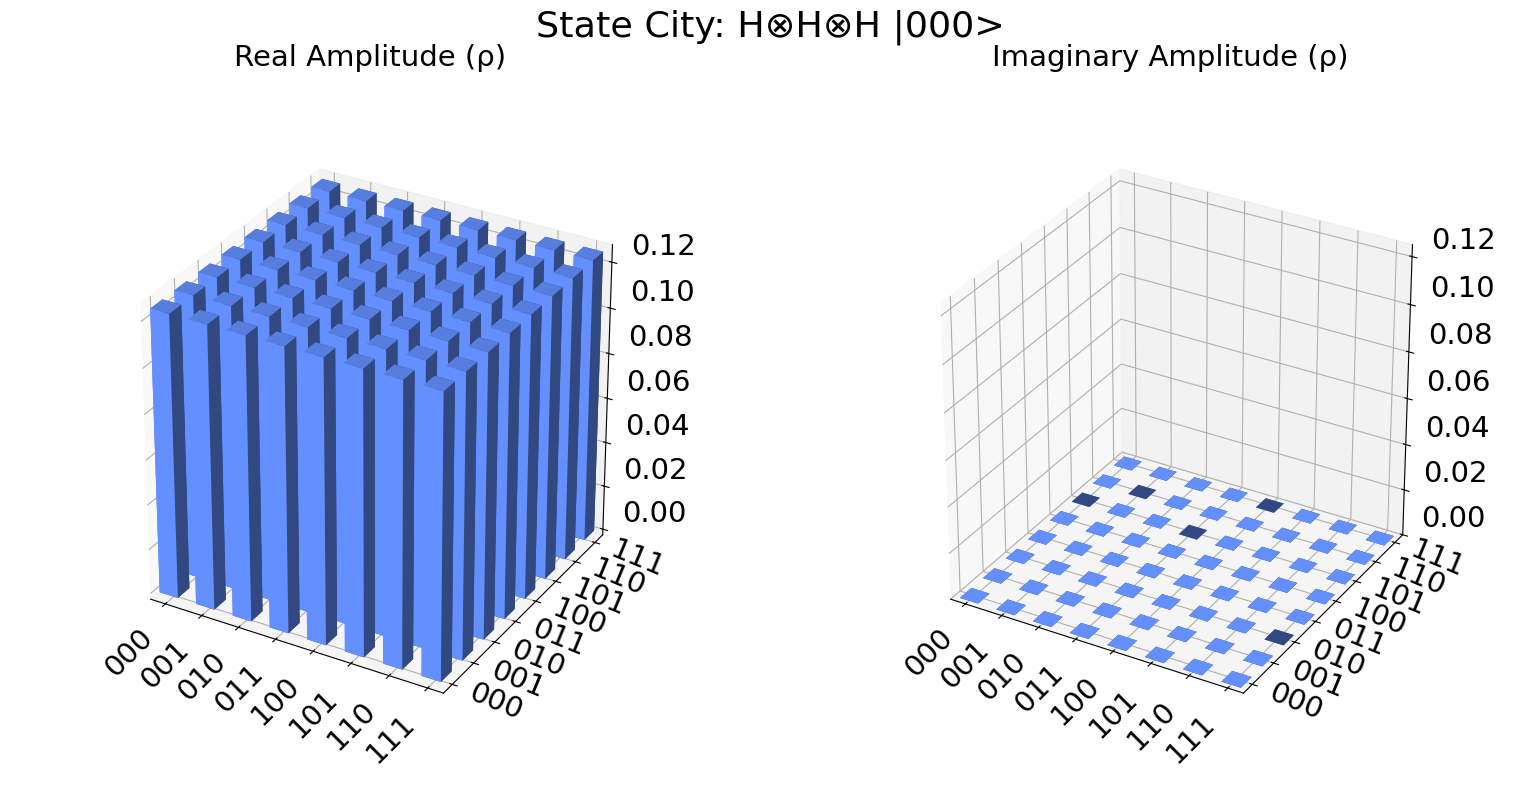

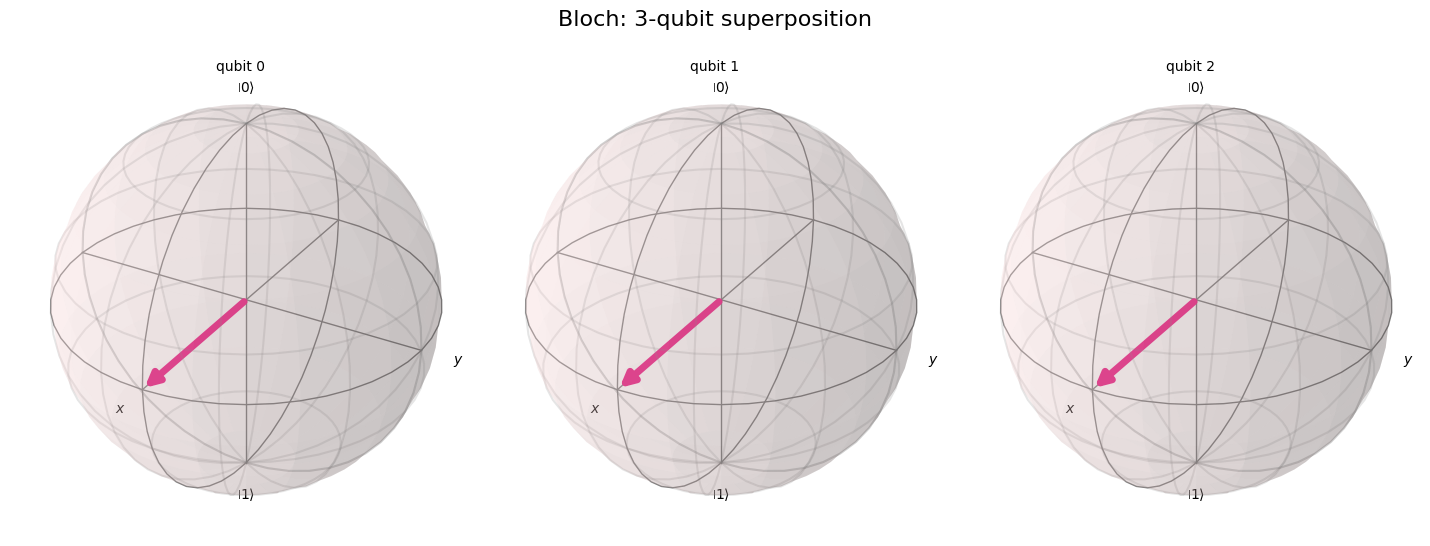

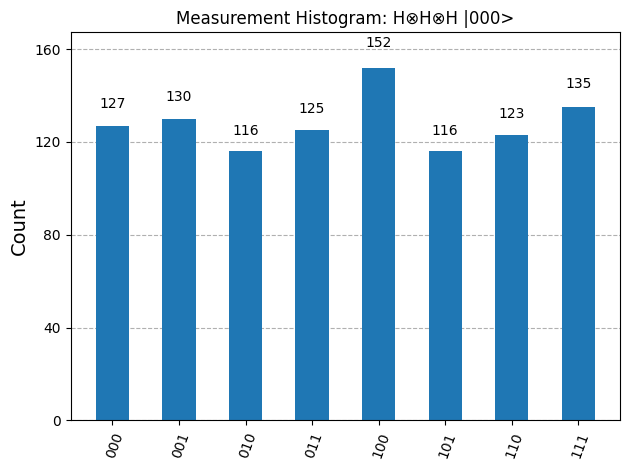

Expected: Equal probability for all 8 outcomes (1/8 each).


In [9]:
# 2️⃣ 3-Qubit System with H⊗H⊗H

qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)

print("\n--- 3-Qubit System: H⊗H⊗H on |000> ---")
print("Statevector length:", len(state3.data))
print("Amplitude summary (first few):", np.round(state3.data[:8], 3))

display(plot_state_city(state3, title="State City: H⊗H⊗H |000>"))
display(plot_bloch_multivector(state3, title="Bloch: 3-qubit superposition"))

qc3_t = transpile(qc3, sim)
res3 = sim.run(qc3_t, shots=1024).result()
counts3 = res3.get_counts()
display(plot_histogram(counts3, title="Measurement Histogram: H⊗H⊗H |000>"))
print("Expected: Equal probability for all 8 outcomes (1/8 each).")


# ***3. Apply H + CX + CX on 3 Qubits and Analyze Correlation***


--- 3-Qubit Correlated (GHZ-like) State ---
Statevector: [0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


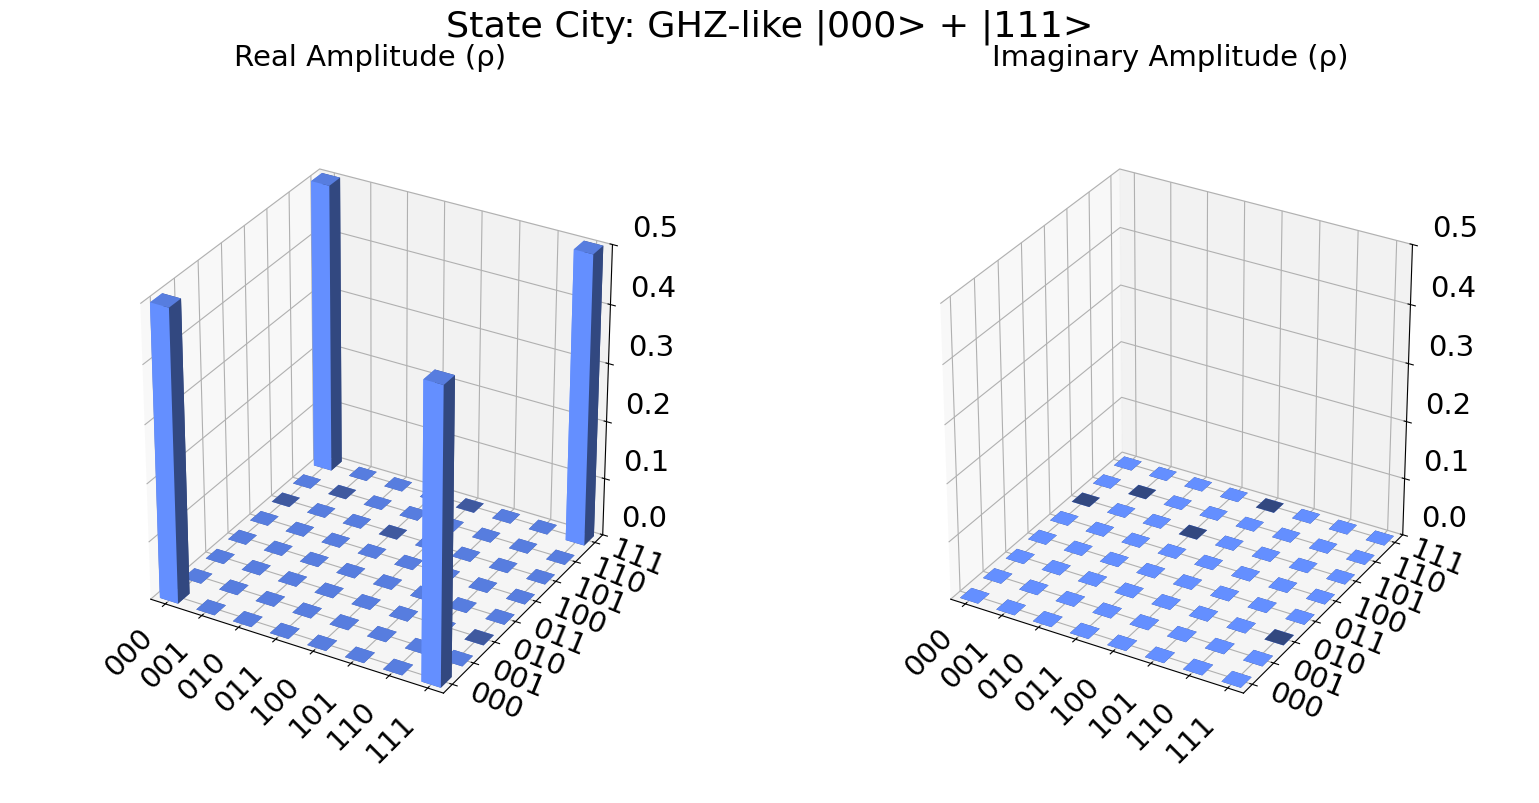

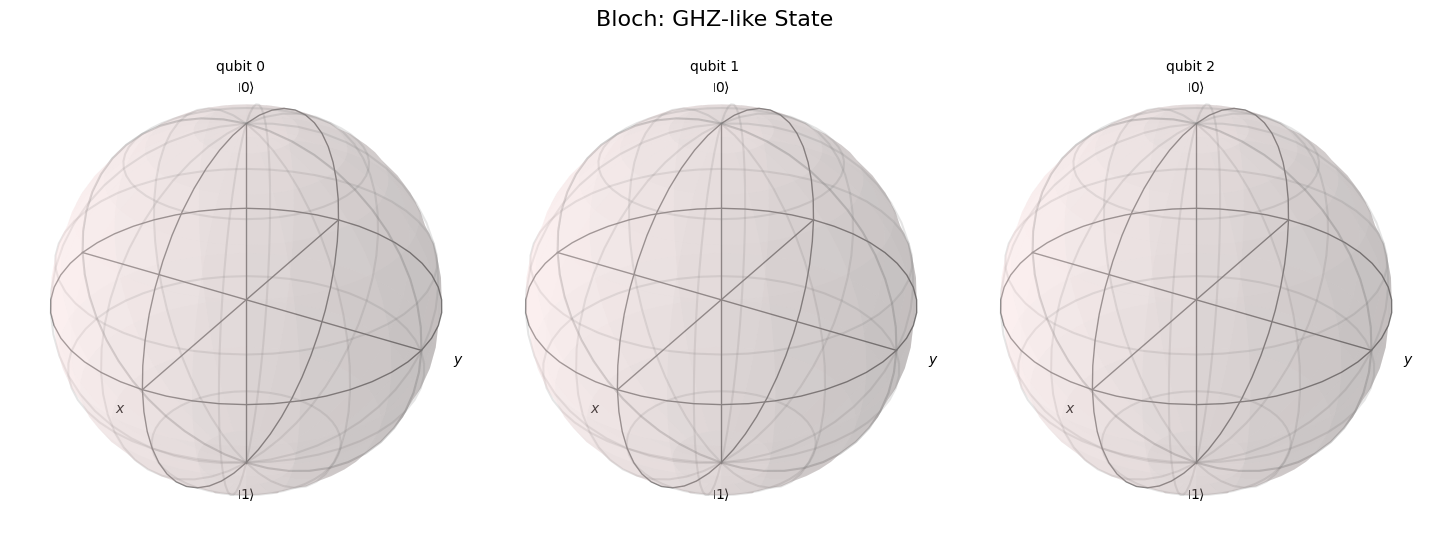

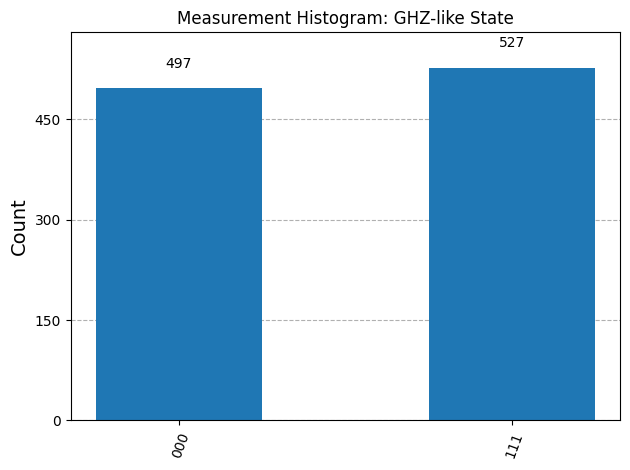

Expected: Only |000> and |111> appear — perfect 3-qubit correlation.


In [10]:
# 3️⃣ Apply H + CX + CX on 3 Qubits (GHZ-like state)

qc_corr = QuantumCircuit(3, 3)
qc_corr.h(0)
qc_corr.cx(0, 1)
qc_corr.cx(0, 2)
qc_corr.measure([0, 1, 2], [0, 1, 2])

qc_corr_state = QuantumCircuit(3)
qc_corr_state.h(0)
qc_corr_state.cx(0, 1)
qc_corr_state.cx(0, 2)
state_corr = Statevector.from_instruction(qc_corr_state)

print("\n--- 3-Qubit Correlated (GHZ-like) State ---")
print("Statevector:", np.round(state_corr.data, 3))

display(plot_state_city(state_corr, title="State City: GHZ-like |000> + |111>"))
display(plot_bloch_multivector(state_corr, title="Bloch: GHZ-like State"))

qc_corr_t = transpile(qc_corr, sim)
res_corr = sim.run(qc_corr_t, shots=1024).result()
counts_corr = res_corr.get_counts()
display(plot_histogram(counts_corr, title="Measurement Histogram: GHZ-like State"))
print("Expected: Only |000> and |111> appear — perfect 3-qubit correlation.")


# ***4. Apply H Twice on |1> and Verify the Original State***


--- H twice on |1> ---
Statevector: [0.+0.j 1.+0.j]


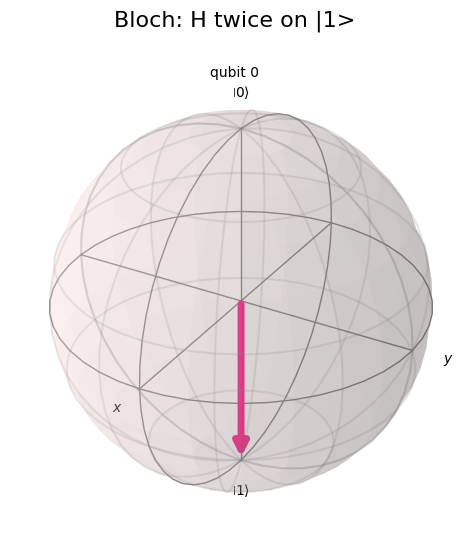

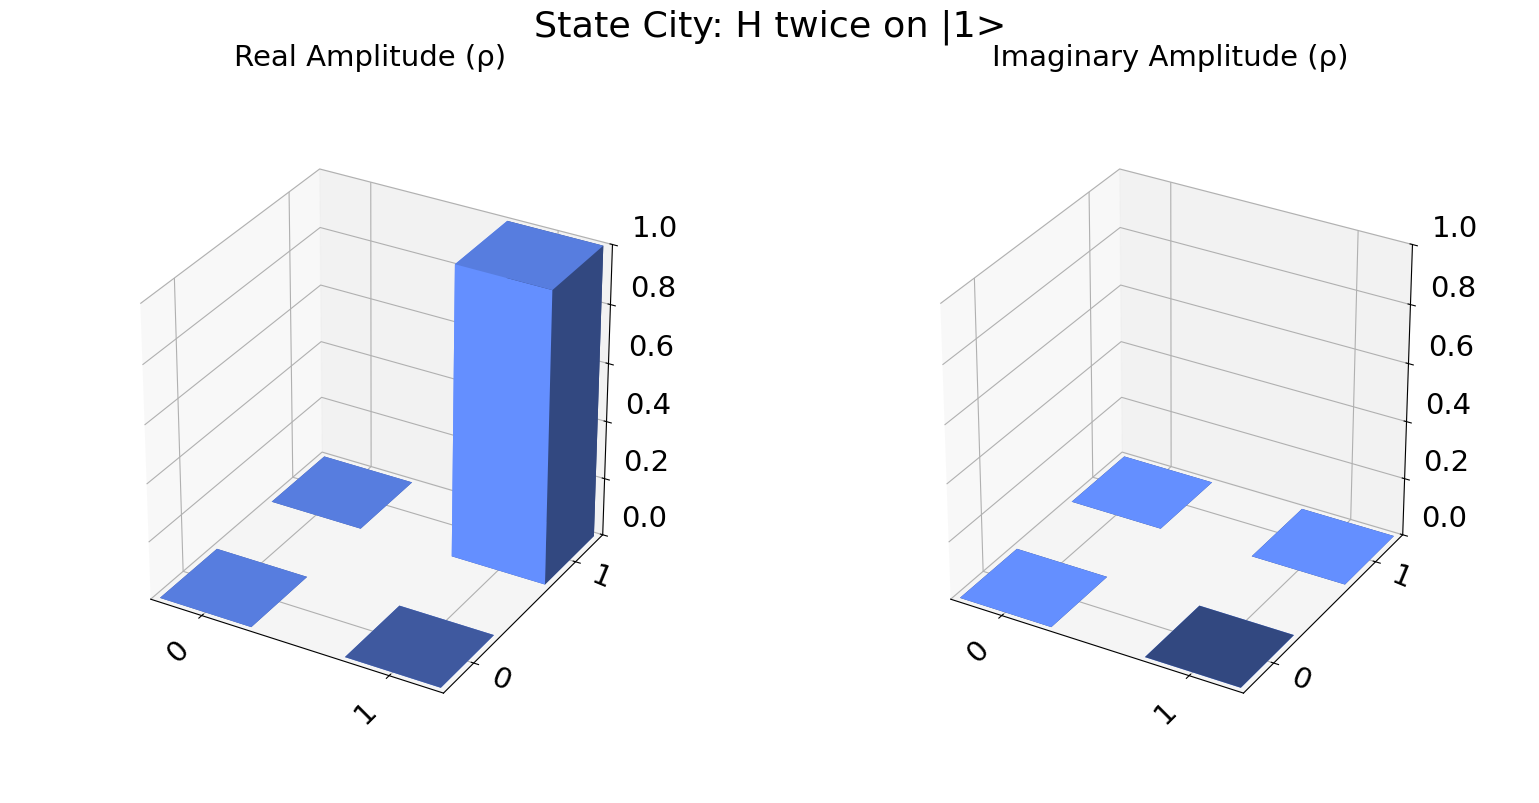

✅ Verified: H² = I (identity) — state returns to |1>.


In [11]:
# 4️⃣ Apply H twice on |1> → Verify Original State

qc_double = QuantumCircuit(1)
qc_double.initialize([0, 1], 0)  # |1>
qc_double.h(0)
qc_double.h(0)
state_double = Statevector.from_instruction(qc_double)

print("\n--- H twice on |1> ---")
print("Statevector:", np.round(state_double.data, 3))

display(plot_bloch_multivector(state_double, title="Bloch: H twice on |1>"))
display(plot_state_city(state_double, title="State City: H twice on |1>"))
print("✅ Verified: H² = I (identity) — state returns to |1>.")


# ***5. Bloch Sphere Rotation after Hadamard***

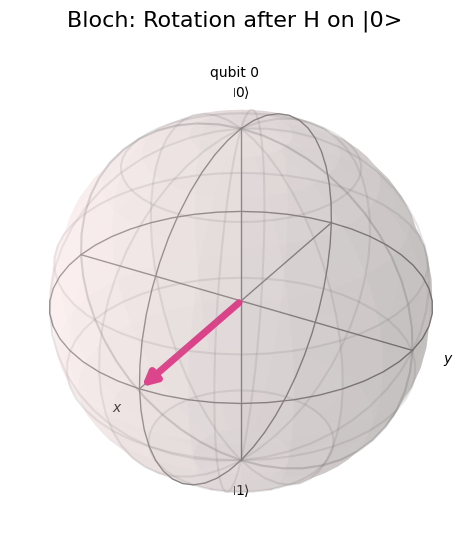

Hadamard rotates |0> from +Z axis to +X axis on Bloch sphere.


In [12]:
# 5️⃣ Bloch Sphere Rotation Examples

qc_rot = QuantumCircuit(1)
qc_rot.h(0)
state_rot = Statevector.from_instruction(qc_rot)

display(plot_bloch_multivector(state_rot, title="Bloch: Rotation after H on |0>"))
print("Hadamard rotates |0> from +Z axis to +X axis on Bloch sphere.")
